In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# path = '2019-11-22_19-07-57_その1.txt'
path = '2019-11-22_19-15-11_その2.txt'

In [3]:
# A1が筋電位、A2が心電図、A3が皮膚電気活動
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(485250, 11)


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,510.0,497.0,102.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,506.0,500.0,102.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,505.0,501.0,102.0,0.0,0.0,0.0


In [4]:
target='A2'
df_target = df[target][10500:11500]

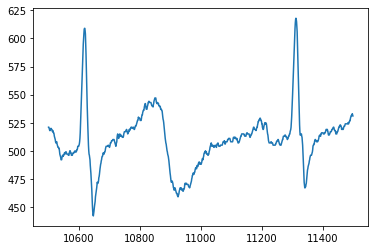

In [5]:
plt.plot(df_target)

# ARモデル

In [6]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [7]:
# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(df_target, regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(df_target, regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(df_target, regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(df_target, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-5.068487871471147, 0.0007814190675780347, 12, 987, {'1%': -4.382907946995653, '5%': -3.8383864295126875, '10%': -3.5569733008709474}, 2904.8459506750846)
ct:
(-5.004794495176949, 0.00020164986188992963, 12, 987, {'1%': -3.967971661746561, '5%': -3.4149475497389377, '10%': -3.1296737078728354}, 2903.494114520011)
c:
(-4.926513062910688, 3.0958710980776224e-05, 12, 987, {'1%': -3.4369927443074353, '5%': -2.864472756705845, '10%': -2.568331546097238}, 2902.306454450379)
nc:
(-0.20110132286311413, 0.6135012216123483, 8, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2923.9209815513977)


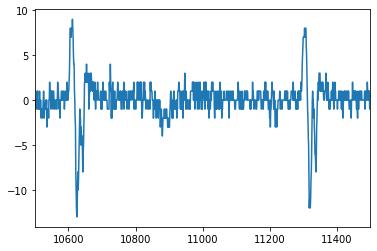

In [10]:
y_diff = df_target.diff().dropna()
y_diff.plot()

In [11]:
y_diff.count()

999

In [12]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-9.359590242186925, 1.5755355588596897e-13, 7, 991, {'1%': -4.382860256751456, '5%': -3.8383621734339877, '10%': -3.5569582904019383}, 2924.541832161086)
ct:
(-9.363886979541268, 5.5529235531363746e-14, 7, 991, {'1%': -3.967934402399965, '5%': -3.41492951994395, '10%': -3.129663101346273}, 2922.5504151462956)
c:
(-9.364638709724835, 7.658526961245186e-16, 7, 991, {'1%': -3.4369658620871286, '5%': -2.8644609013346485, '10%': -2.56832523159495}, 2920.5523998078297)
nc:
(-9.369646564378469, 2.5202690477950716e-16, 7, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2918.5652821715557)


In [13]:
model = ar_model.AR(y_diff)
for i in range(20):
    results = model.fit(maxlag=i+1)
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  0.2244206422275231
lag =  2 aic :  0.19059094926881556
lag =  3 aic :  0.18718563839082497
lag =  4 aic :  0.17405757629573615
lag =  5 aic :  0.1691704580906278
lag =  6 aic :  0.1676990604597196
lag =  7 aic :  0.1552200490071276
lag =  8 aic :  0.15429744807078905
lag =  9 aic :  0.154404032042926
lag =  10 aic :  0.15730187858483358
lag =  11 aic :  0.15550832339489315
lag =  12 aic :  0.15513169457209974
lag =  13 aic :  0.15812117925604463
lag =  14 aic :  0.15766719830899623
lag =  15 aic :  0.15950407074877895
lag =  16 aic :  0.16125868942020377
lag =  17 aic :  0.16191146995416827
lag =  18 aic :  0.16102472134417506
lag =  19 aic :  0.1612119592008614
lag =  20 aic :  0.16190526089444005


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<BarContainer object of 991 artists>

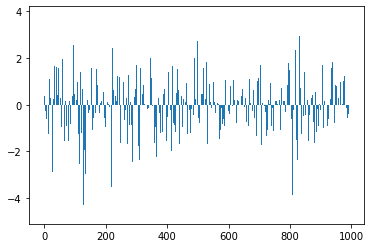

In [14]:
# モデルのあてはめ
# AICの結果からmaxlag=12としてラグは11
results11 = model.fit(maxlag=12, ic='aic')
# 残差
res11 = results11.resid
# 残差の出力
plt.bar(range(len(res11)), res11)

In [15]:
results11.k_ar

8

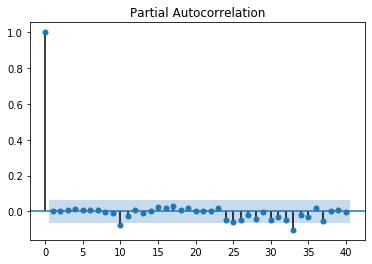

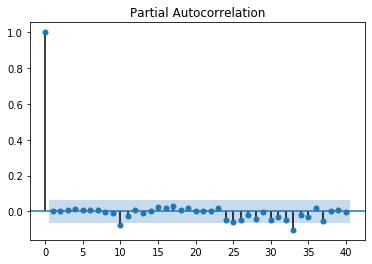

In [18]:
# 偏自己相関
tsaplots.plot_pacf(res11, lags=40)

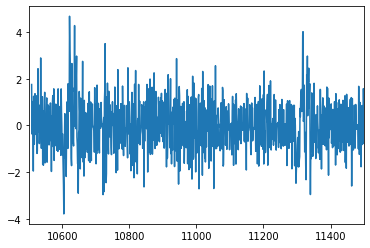

In [19]:
(results11.predict() - y_diff).plot()

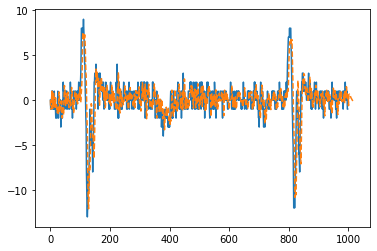

In [21]:
# 将来予測
# 原系列の表示
plt.plot(df_target.diff().dropna().values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y_diff[:11], 
                    results11.fittedvalues, 
                    results11.predict(98-11, 107, dynamic=True))), 
    '--', label="forecast")